In [1]:
%matplotlib inline

In [5]:
from kid_readout.measurement.io import nc
from kid_readout.measurement import temperature

In [3]:
ncf = nc.NCFile('/data/detectors/2016-08-25_193610_Tc.nc')
ncf.node_names()

[u'sweep']

In [4]:
sweep = ncf.sweep

In [7]:
sweep.num_channels

16

In [6]:
temperature.add_temperature(sweep, cryostat='hpd')

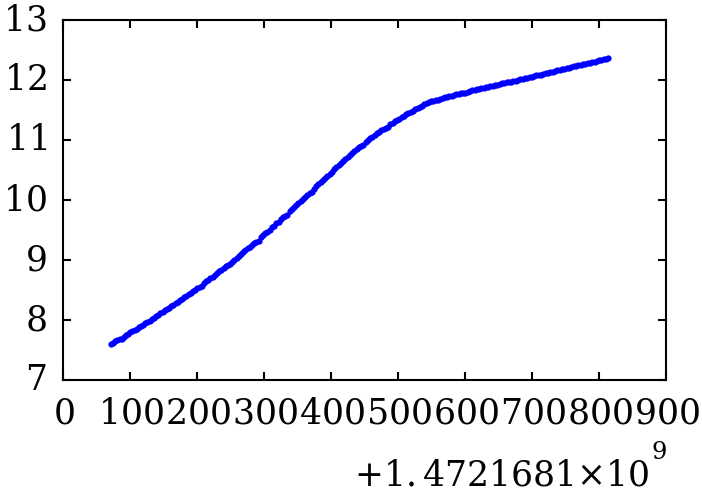

In [13]:
fig, ax = plt.subplots()

for sa in sweep.stream_arrays:
    ax.plot(sa.epoch, sa.state.temperature.primary_package, '.b')

In [14]:
T_mappable = mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=2, vmax=14), cmap=mpl.cm.hot)
epoch_mappable = mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=sweep.stream_arrays[0].epoch,
                                                                 vmax=sweep.stream_arrays[-1].epoch),
                                                                 cmap=mpl.cm.coolwarm)

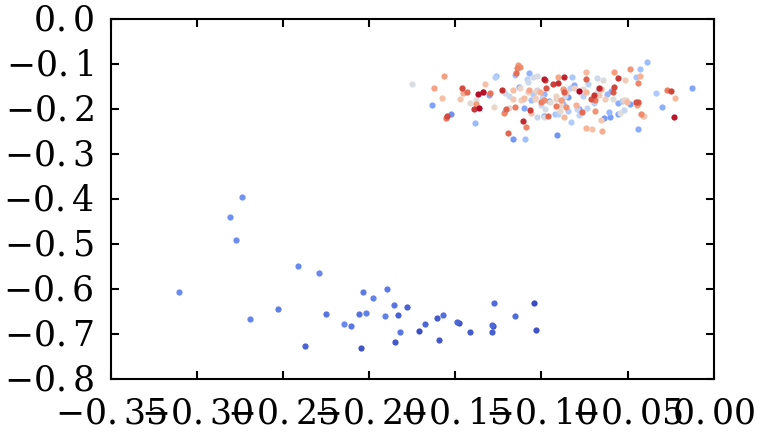

In [16]:
fig, ax = plt.subplots()

for sa in sweep.stream_arrays:
    ax.plot(sa[0].s21_point.real, sa[0].s21_point.imag, '.',
            color=epoch_mappable.to_rgba(sa.epoch))

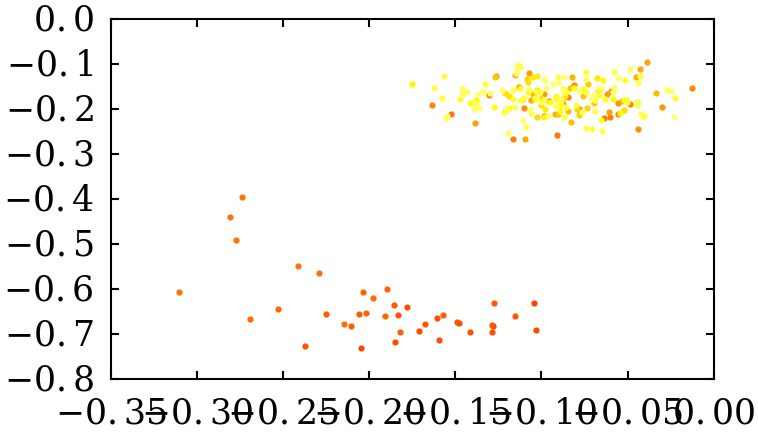

In [17]:
fig, ax = plt.subplots()

for sa in sweep.stream_arrays:
    ax.plot(sa[0].s21_point.real, sa[0].s21_point.imag, '.',
            color=T_mappable.to_rgba(sa[0].state.temperature.primary_package))

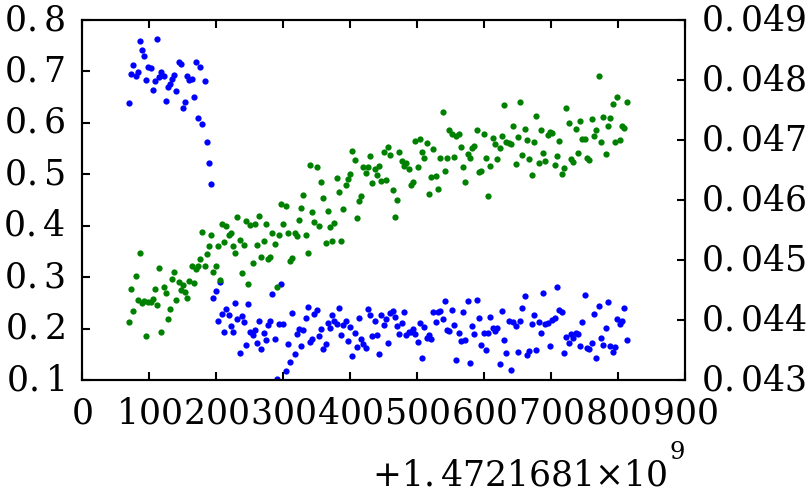

In [18]:
fig, ax = plt.subplots()
e_ax = ax.twinx()

for sa in sweep.stream_arrays:
    ax.plot(sa.epoch, np.abs(sa[0].s21_point), '.b')
    e_ax.plot(sa.epoch, np.abs(sa[0].s21_point_error), '.g')

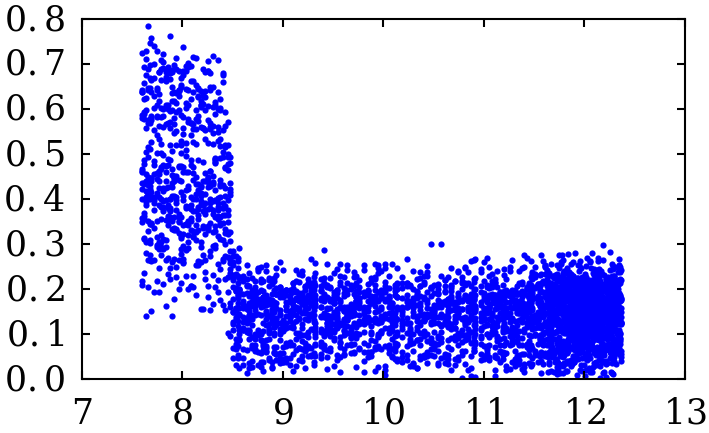

In [23]:
fig, ax = plt.subplots()

for channel in range(sweep.num_channels):
    for sa in sweep.stream_arrays:
        ax.plot(sa.state.temperature.primary_package, np.abs(sa[channel].s21_point), '.b')